<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [197]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [198]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [199]:
data = pd.read_csv('./train.csv')
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'].str.replace('\D', ''), errors='coerce')
data.dropna(inplace=True)
data.shape

(5273, 20)

In [200]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [201]:
data.isnull().sum().sum()

0

In [202]:
data[data['ClientPeriod'] == 0].shape   # проверка на равенство нулю

(0, 20)

In [203]:
data['ClientPeriod'].dtypes

dtype('int64')

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [204]:
# YOUR CODE
data.value_counts()

ClientPeriod  MonthlySpending  TotalSpent  Sex     IsSeniorCitizen  HasPartner  HasChild  HasPhoneService  HasMultiplePhoneNumbers  HasInternetService  HasOnlineSecurityService  HasOnlineBackup      HasDeviceProtection  HasTechSupportAccess  HasOnlineTV          HasMovieSubscription  HasContractPhone  IsBillingPaperless  PaymentMethod              Churn
1             20.90            209.0       Female  0                No          No        Yes              No                       No                  No internet service       No internet service  No internet service  No internet service   No internet service  No internet service   Month-to-month    No                  Mailed check               1        2
              69.35            6935.0      Male    0                No          No        Yes              No                       Fiber optic         No                        No                   No                   No                    No                   No                  

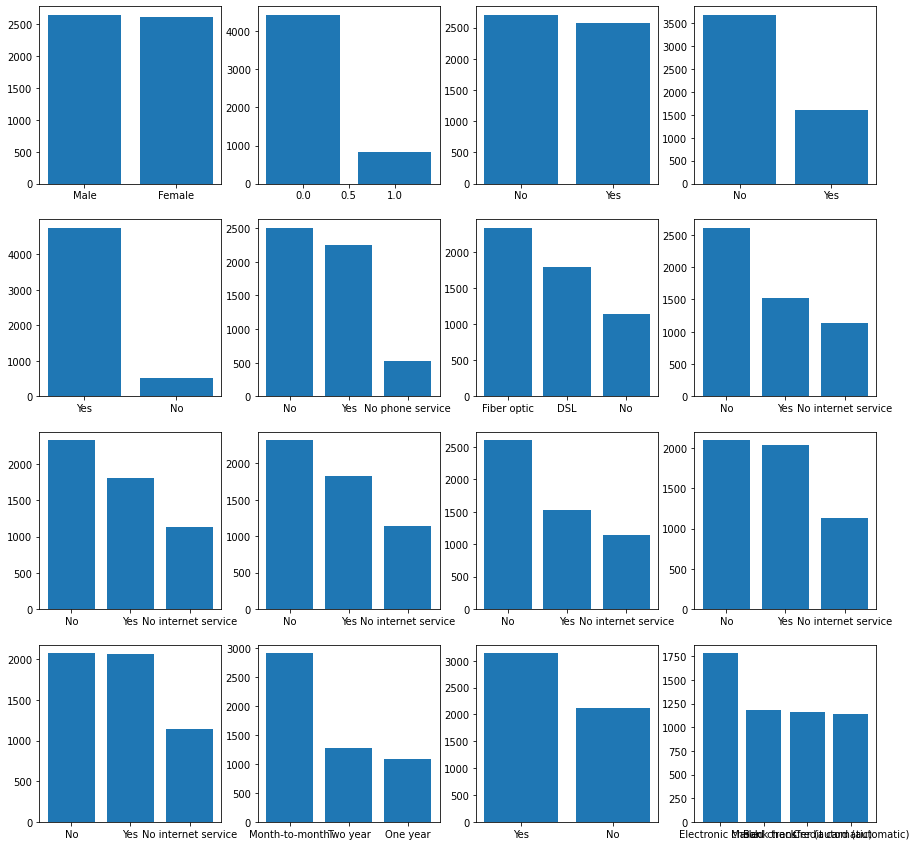

In [205]:
fig, ax = plt.subplots(4, 4, figsize = (15, 15))

for idx, key in enumerate(cat_cols):
  ax[idx//4, idx%4].bar(data[key].value_counts().index, data[key].value_counts()) # idx//4 - строка, idx%4 - столбец
plt.show()

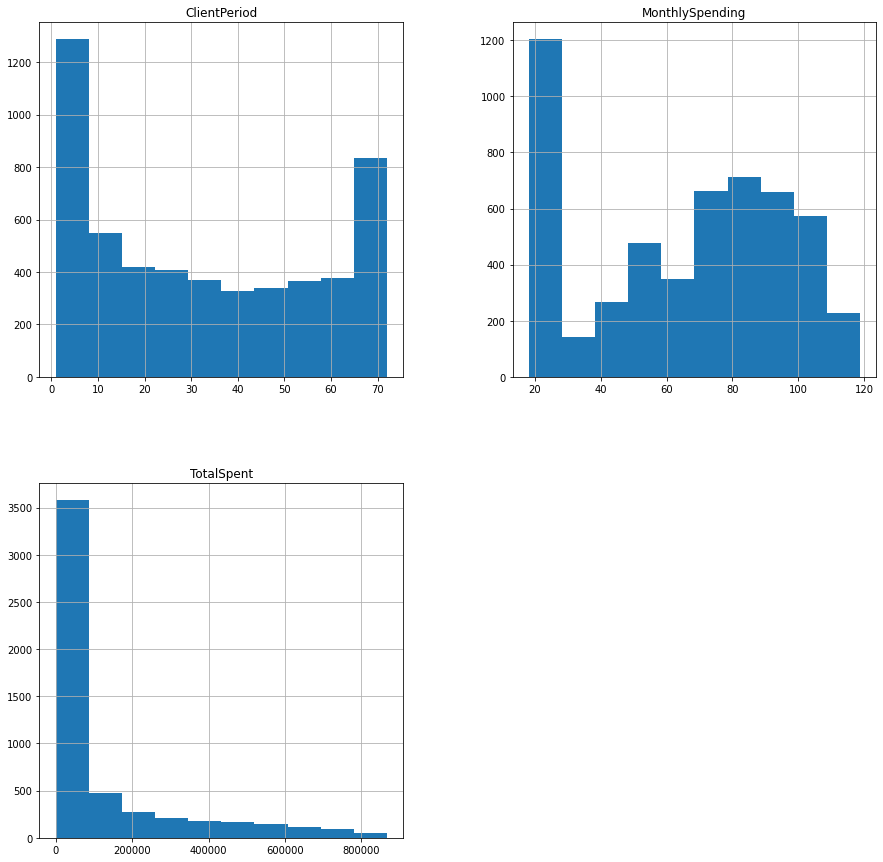

In [206]:
data.hist(column=num_cols, figsize=(15, 15), bins = 10)
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [208]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [209]:
data1 = data.copy()
stand = StandardScaler()
#for col in num_cols:
data1[num_cols]=stand.fit_transform(data1[num_cols])

data1=pd.get_dummies(data1)

In [210]:
X = data1.drop([target_col], axis=1)
y = data1[target_col]
clf = LogisticRegressionCV(scoring='roc_auc', refit=True).fit(X, y)

In [211]:
clf.score(X, y)

0.8473184519253207

In [212]:
clf.C_  # параметр С

array([166.81005372])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [213]:
!pip install catboost

In [214]:
from catboost import CatBoostClassifier

In [215]:
stand = StandardScaler()
data[num_cols]=stand.fit_transform(data[num_cols])

X = data.drop([target_col], axis=1)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [219]:
cat =  CatBoostClassifier(eval_metric='AUC', max_depth=11) 
cat.fit(X_train, y_train, cat_features=cat_cols, eval_set=(X_test, y_test))

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.044502
0:	test: 0.8213448	best: 0.8213448 (0)	total: 51.6ms	remaining: 51.6s
1:	test: 0.8283046	best: 0.8283046 (1)	total: 67.6ms	remaining: 33.7s
2:	test: 0.8351958	best: 0.8351958 (2)	total: 94.3ms	remaining: 31.3s
3:	test: 0.8378443	best: 0.8378443 (3)	total: 114ms	remaining: 28.5s
4:	test: 0.8391613	best: 0.8391613 (4)	total: 154ms	remaining: 30.6s
5:	test: 0.8381783	best: 0.8391613 (4)	total: 192ms	remaining: 31.8s
6:	test: 0.8427739	best: 0.8427739 (6)	total: 238ms	remaining: 33.7s
7:	test: 0.8445503	best: 0.8445503 (7)	total: 244ms	remaining: 30.2s
8:	test: 0.8456033	best: 0.8456033 (8)	total: 250ms	remaining: 27.5s
9:	test: 0.8459052	best: 0.8459052 (9)	total: 265ms	remaining: 26.2s
10:	test: 0.8458717	best: 0.8459052 (9)	total: 274ms	remaining: 24.7s
11:	test: 0.8451454	best: 0.8459052 (9)	total: 285ms	remaining: 23.4s
12:	test: 0.8458746	best: 0.8459052 (9)	total: 289ms	remaining: 21.9s
13:	test: 0.8471931	best: 0.8471931 (13)	total: 308ms	remaining: 21

Выпишите какое лучшее качество и с какими параметрами вам удалось получить



0.8511265 


In [220]:
cat.predict_proba(X_test)

array([[0.73302882, 0.26697118],
       [0.60025022, 0.39974978],
       [0.78331727, 0.21668273],
       ...,
       [0.93365247, 0.06634753],
       [0.82521988, 0.17478012],
       [0.39701821, 0.60298179]])

# Предсказания

In [221]:
best_model = cat

In [222]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'].str.replace('\D', ''), errors='coerce')  # удаляю пробелы
X_test[num_cols] = stand.transform(X_test[num_cols])

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index=None)

In [223]:
X_test[num_cols].dtypes

ClientPeriod       float64
MonthlySpending    float64
TotalSpent         float64
dtype: object

In [224]:
!cat my_submission.csv

Id,Churn
0,0.08584449005748694
1,0.574766183654592
2,0.6257097919846681
3,0.0431095991797032
4,0.01837731535930133
5,0.13426017752538677
6,0.4202025414727494
7,0.17019313628636482
8,0.13531105469588045
9,0.28366809677737675
10,0.22521002523939948
11,0.19233606927948038
12,0.2559655496042266
13,0.1770243711504894
14,0.04251460503232928
15,0.0586801893259849
16,0.2574640762541045
17,0.3029469507885894
18,0.06411211883611488
19,0.08729715651038654
20,0.26555428217197746
21,0.03937040268005111
22,0.6659664281301201
23,0.34670970042905586
24,0.2140146130672666
25,0.4895447986222088
26,0.16261325504062377
27,0.02918698581315465
28,0.045836637070400095
29,0.01791737956769908
30,0.502217743683887
31,0.2943009056319897
32,0.6851769857652943
33,0.4978740227439215
34,0.1480276170073137
35,0.1240932339140704
36,0.5554815486721244
37,0.0959465463527792
38,0.1503776306193482
39,0.058348825110384965
40,0.45546260251251613
41,0.648414668456504
42,0.47122449991041554
43,0.32915415687254546
44,0.4042857

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.